# Exploratory Data Analysis

Author: Gillian A. McGinnis, final-semester M.S. Information Science - Machine Learning  
The University of Arizona College of Information  
INFO 698 - Capstone  
Start date: 24 September 2025  
Last updated: 04 October 2025

In [1]:
"""
Module providing supporting code and generating all images/tables for EDA.
"""

'\nModule providing supporting code and generating all images/tables for EDA.\n'

## Load Required Libraries

In [43]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import datetime as dt

In [3]:
## (Optional chunk)
# Current session information
import session_info
session_info.show(dependencies=False)

## Load data

Files of interest:
- `weir_calibration.csv` includes calibration points for the weir
- `bci_lutzweir_combined.csv` includes raw runoff measurement, corrected runoff measurement, data source (*Chart measurements can be removed)
- `bci_cl_ra_elect2.CSV` has corrected rainfall (`ra`) in mm with measurements of `0` as `NA`s (`bci_cl_ra_elect.csv` has `0`s)
- `bci_lutz_deep_gsm_man.csv`, `bci_lutz_shallow_gsm_man.csv` have soil moisture measurements (water by wet weight and water by dry weight; one can be chosen for analysis as they are linearly related)
<!-- `bci_cl_ra_elect.csv` has corrected rainfall (`ra`) in mm, contains `0`s (large file) -->

All values level values are in mm, and datetime is in UTC-5 (Panama time zone).


### Import

In [4]:
## Calibrations dataset
data_all_calibration = pd.read_csv(
    "data/weir_calibration.csv",
    usecols = ['datetime', 'weir_level'], # weir_hour is a repeat of the time in datetime and can be skipped
    parse_dates=['datetime'],
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

data_all_calibration.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6465 entries, 1994-01-03 08:46:00 to 2025-09-02 08:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   weir_level  6465 non-null   int64
dtypes: int64(1)
memory usage: 101.0 KB


In [5]:
# Combined data

data_all_combined = pd.read_csv(
    "data/bci_lutzweir_combined.csv",
    usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
    parse_dates=['datetime'],
    dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

## This variation checks first if the dataset is already loaded into the workspace
# try:
#     if data_combined.empty == False:
#         print("Data loaded, random sample shown below")
#         print(data_combined.sample(n=5))
# except NameError:
#     print("Data has not yet been read in, loading now...")
#     data_combined = pd.read_csv(
#         "data/bci_lutzweir_combined.csv",
#         usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_all_combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3951119 entries, 1972-01-01 01:00:00 to 1977-03-06 23:45:00
Data columns (total 6 columns):
 #   Column    Dtype   
---  ------    -----   
 0   level     float64 
 1   raw       float64 
 2   chk_note  category
 3   chk_fail  object  
 4   comment   object  
 5   source    category
dtypes: category(2), float64(2), object(2)
memory usage: 158.3+ MB


In [6]:
# Rainfall dataset

# This data set skips the 0 readings (therefore much smaller):
data_all_rainfall = pd.read_csv(
    "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
    parse_dates=['datetime'],
    dtype = {'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y %H:%M:%S',
    index_col='datetime'
)

## This data set includes the 0 readings:
# data_rainfall_zeroes = pd.read_csv(
#         "data/bci_elect_cl_ra/bci_cl_ra_elect.csv",
#         usecols = ['datetime', 'ra', 'raw', 'chk_note', 'chk_fail'],
#         # "data/bci_elect_cl_ra/bci_cl_ra_elect2.CSV",
#         # usecols = ['datetime', 'level', 'raw', 'chk_note', 'chk_fail', 'comment', 'source'],
#         parse_dates=['datetime'],
#         dtype = {'chk_note':'category', 'chk_fail':'str'},
#         # dtype = {'source':'category', 'chk_note':'category', 'chk_fail':'str', 'comment':'str'},
#         date_format='%d/%m/%Y %H:%M:%S'
#     )

data_all_rainfall.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179640 entries, 1929-01-02 08:00:00 to 2025-08-04 11:55:00
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   ra        179640 non-null  float64 
 1   raw       179640 non-null  float64 
 2   chk_note  179640 non-null  category
 3   chk_fail  29 non-null      object  
dtypes: category(1), float64(2), object(1)
memory usage: 5.7+ MB


In [7]:
# Soil datasets

# Shallow
data_all_soil_shallow = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_shallow_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

# Deep
data_all_soil_deep = pd.read_csv(
    "data/bci_manual_soilh/bci_lutz_deep_gsm_man.csv",
    parse_dates=['date'],
    usecols = ['date', 'depth', 'sample', 'h2o_by_wet', 'chk_note', 'chk_fail'],
    dtype = {'depth':'category', 'sample':'category', 'chk_note':'category', 'chk_fail':'str'},
    date_format='%d/%m/%Y',
    index_col='date'
)

data_all_soil_shallow.info()
data_all_soil_deep.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18556 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       18556 non-null  category
 1   sample      18556 non-null  category
 2   h2o_by_wet  18556 non-null  float64 
 3   chk_note    18556 non-null  category
 4   chk_fail    178 non-null    object  
dtypes: category(3), float64(1), object(1)
memory usage: 490.8+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15637 entries, 1972-03-03 to 2025-06-26
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   depth       15637 non-null  category
 1   sample      15637 non-null  category
 2   h2o_by_wet  15637 non-null  float64 
 3   chk_note    15637 non-null  category
 4   chk_fail    20 non-null     object  
dtypes: category(3), float64(1), object(1)
memory usage: 413.4+ KB


*A note about the soil datasets:

Both `h2o_by_wet` and `h2o_by_dry` are available in the datasets.
Because they are linearly related to each other, only one of them is necessary for modelling.
Arbitrarily, `h2o_by_wet` has been chosen for this analysis.

### Cleanup

Some data cleanup is necessary to ensure ease of combining the sets and creation of the models.

#### Dates

In [8]:
# Get earliest and latest dates of sources

cat_source = data_all_combined.sort_index()['source'].unique().tolist()
# Header for printed table
print("Earliest", "\t    ", "Latest", "\t\t", "Source")
# Iterate across each source type
for cat in cat_source:
    # If the source is NaN
    if pd.isna(cat) == True:
        temp_subset = data_all_combined[data_all_combined['source'].isnull()]
    else:
        temp_subset = data_all_combined[data_all_combined['source'] == cat]
    # Sort index
    temp_subset = temp_subset.sort_index()
    # Print
    print(temp_subset.index[0], "", temp_subset.index[-1], cat)

# Save space, remove no longer needed items
del cat_source, cat, temp_subset

Earliest 	     Latest 		 Source
1972-01-01 01:00:00  2015-03-18 14:15:00 CHART
1972-09-16 00:15:00  2025-08-01 13:00:00 nan
1989-07-19 11:55:00  1996-10-01 23:55:00 CHART+AF
1996-10-02 00:00:00  2013-01-13 05:50:00 ISCO
2012-04-23 08:30:00  2012-04-24 08:35:00 ESTIMATED
2014-08-22 10:30:00  2021-05-19 09:40:00 RADAR
2018-08-31 10:05:00  2018-09-05 12:55:00 TROLL


In [9]:
# Create function to filter dates
def filter_dates(input_dataset, input_date_start, input_date_end, drop_dates = False):
# def filter_dates(input_dataset, input_date_start = date_weir_start, input_date_end = date_weir_end, drop_dates = False):
    """Function to filter inputted data set by start and end dates.
    
    Args:
        input_dataset (pd.DataFrame): Data indexed by datetime.
        input_date_start (Timestamp): The start date, defaults to the earliest from the combined data set.
        input_date_end (Timestamp): The end date, defaults to the earliest from the combined data set.
        drop_dates (bool): Whether to remove the values between the specified dates.
    
    Returns:
        DataFrame sorted and filtered to be within the specified range.
    """
    # Sort the dataframe
    data_subset = input_dataset.sort_index()
    # Filter between dates
    if drop_dates == False:
        # data_subset = data_subset.loc[input_date_start:input_date_end]
        data_subset = data_subset[input_date_start:input_date_end]
    else:
        data_subset = data_subset.drop(data_subset.loc[input_date_start:input_date_end].index)
    return data_subset

Only values that are not solely reliant on CHART will be evaluated (i.e., after 1989).

In [10]:
# Filter the dataset to start once values stopped by being recorded by CHART
date_weir_start = data_all_combined[data_all_combined['source'] == 'CHART+AF'].sort_index().index[0]
date_weir_end = data_all_combined.sort_index().index[-1]

print("Non-CHART values:", date_weir_start, "through", date_weir_end)

Non-CHART values: 1989-07-19 11:55:00 through 2025-08-01 13:00:00


In 2013 & 2014, the electronic sensor died and there was no backup. Values were recorded using CHART resource, and gap filled accordingly.
The model cannot be trained on this data, as is using a different resource and all `raw` values are `-999.0`.

In [11]:
# data_gap = data_all_combined.sort_index()['2013-01-01 00:00:00':'2014-08-22 23:59:59']
data_gap = filter_dates(data_all_combined, '2013-01-01 00:00:00', '2014-08-22 23:59:59')

# The ISCO sensor failed in early 2013
# Get the earliest date of gap filling
date_gap_start = data_gap[data_gap['source'] == 'CHART'].index[0]

# Values started being recorded with RADAR in late 2014
# Get the latest date of gap filling
date_gap_end = data_gap[data_gap['source'] != 'RADAR'].index[-1]

print("Two year gap:", date_gap_start, "through", date_gap_end)
## EXPECTED -- 2013-01-02 18:54:38 - 2014-08-22 10:21:32
del data_gap

Two year gap: 2013-01-02 18:54:38 through 2014-08-22 10:21:32


In [12]:
# def apply_filter_dates(input_dataset):
#     data_subset = filter_dates(input_dataset = input_dataset, input_date_start = date_weir_start, input_date_end = date_weir_end, drop_dates = False)
#     data_subset = filter_dates(input_dataset = data_subset, input_date_start = date_gap_start, input_date_end = date_gap_end, drop_dates = True)
#     return data_subset

In [13]:
# Apply filter
data_combined = filter_dates(data_all_combined, date_weir_start, date_weir_end)
data_combined = filter_dates(data_combined, date_gap_start, date_gap_end, drop_dates = True)

data_calibration = filter_dates(data_all_calibration, date_weir_start, date_weir_end)
data_calibration = filter_dates(data_calibration, date_gap_start, date_gap_end, drop_dates = True)

data_rainfall = filter_dates(data_all_rainfall, date_weir_start, date_weir_end)
data_rainfall = filter_dates(data_rainfall, date_gap_start, date_gap_end, drop_dates = True)

data_soil_deep = filter_dates(data_all_soil_deep, date_weir_start, date_weir_end)
data_soil_deep = filter_dates(data_soil_deep, date_gap_start, date_gap_end, drop_dates = True)

data_soil_shallow = filter_dates(data_all_soil_shallow, date_weir_start, date_weir_end)
data_soil_shallow = filter_dates(data_soil_shallow, date_gap_start, date_gap_end, drop_dates = True)

In [14]:
# Remove old stuff to save space
del data_all_combined, data_all_rainfall, data_all_soil_shallow, data_all_soil_deep

#### Soil depths
There are some duplicated records between the "shallow" and "deep" data set. Most are identical, but there were two dates with differing records.
It was concluded that those values from the "deep" set with a depth of "0–10" may be eliminated.

In [15]:
# Select the values in the deep data set that have the shallower depth
data_deep_subset = data_soil_deep[data_soil_deep["depth"] != "30-40"]
# Filter set to only be of dates where deep set has shallow values
data_shallow_subset = data_soil_shallow[data_soil_shallow.index.isin(data_deep_subset.index)]
# Inner merge based on date and sample number
data_soil_mismatch = pd.merge(data_deep_subset.reset_index(), data_shallow_subset.reset_index(), on=["date", "sample"], suffixes=("_deep", "_shallow"), how="inner")
# Create a variable to indicate if the values match
data_soil_mismatch["match_wet"] = (data_soil_mismatch["h2o_by_wet_deep"] == data_soil_mismatch["h2o_by_wet_shallow"])
# The dry var was not loaded in this analysis, but the exact same issue occurred in it (i.e., the same dates had mismatching values)
# match_all["match_dry"] = (match_all["h2o_by_dry_deep"] == match_all["h2o_by_dry_shallow"])
# Set the sample var to be an integer, for sorting purposes
data_soil_mismatch["sample"] = data_soil_mismatch["sample"].astype('int')
# Sort by date and sample for readability
data_soil_mismatch = data_soil_mismatch.sort_values(by=['date', 'sample'])
# Remove unneeded columns
data_soil_mismatch = data_soil_mismatch.drop(['chk_fail_shallow', 'chk_fail_deep'], axis=1)
# Filter where there is a mismatch
data_soil_mismatch = data_soil_mismatch[(data_soil_mismatch["match_wet"]==False)]
# match_all = match_all[['date', 'depth_shallow', 'depth_deep', 'sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep', 'h2o_by_dry_shallow', 'h2o_by_dry_deep', 'chk_note_shallow', 'chk_note_deep']]
# Reordering vars for readability
data_soil_mismatch = data_soil_mismatch[['date', 'depth_shallow', 'depth_deep', 'sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep', 'chk_note_shallow', 'chk_note_deep']]
# Print result
data_soil_mismatch

,date,depth_shallow,depth_deep,sample,h2o_by_wet_shallow,h2o_by_wet_deep,chk_note_shallow,chk_note_deep
129,2005-06-16,1-10,0-10,1,43.0,40.8,good,good
128,2005-06-16,1-10,0-10,2,37.8,36.5,good,good
127,2005-06-16,1-10,0-10,3,36.1,36.4,good,good
126,2005-06-16,1-10,0-10,4,38.4,38.6,good,good
125,2005-06-16,1-10,0-10,5,37.7,37.5,good,good
124,2005-06-16,1-10,0-10,6,37.9,37.5,good,good
123,2005-06-16,1-10,0-10,7,32.7,34.1,good,good
122,2005-06-16,1-10,0-10,8,28.1,28.8,good,good
121,2005-06-16,1-10,0-10,9,34.2,33.2,good,good
120,2005-06-16,1-10,0-10,10,32.1,32.2,good,good


In [16]:
# Cleanup
del data_shallow_subset, data_deep_subset, data_soil_mismatch

In [17]:
# Remove the duplicated samples
data_soil_deep = data_soil_deep[data_soil_deep["depth"] != "0-10"]

### CHART

Only non-CHART values will be used for making the model.
Prior to removing them, other missing values must also be dealt with, as they may relate to gaps within CHART-reliant ranges.

In [ ]:
# Modifying 
# Backup
data_combined_backup = data_combined.copy()
# Create a column which will forward fill the source--i.e., fill NAs with the most recent value reported in 'source'
data_combined_backup['source_ffill'] = data_combined_backup['source'].ffill()
# Create a column which will back fill the source--i.e., fill NAs with the next value reported in 'source'
data_combined_backup['source_bfill'] = data_combined_backup['source'].bfill()

# Filtering to remove CHART values and gap fills that rely on CHART values
data_combined_backup_1 = data_combined_backup[
    # Remove CHART values
    (data_combined_backup["source"] != "CHART") &
    # and
    (
        # selecting values with NA sources where the most recent & next sources are the same
        (data_combined_backup["source_ffill"] == data_combined_backup["source_bfill"]) |
        # or
        # selecting if there is no next value to fill
        # (i.e., the source remains the same into the present)
        (data_combined_backup["source_bfill"].isnull())
    ) &
    # and
    (((data_combined_backup["source_ffill"] != "CHART")) &
    ((data_combined_backup["source_bfill"] != "CHART")))
    # # remove NA values where the most recent source was CHART
    # ((data_combined_backup["source_ffill"] != "CHART") & data_combined_backup['source'].isnull()) &
    # # and
    # # remove NA-source values where the next source is CHART
    # ((data_combined_backup["source_bfill"] != "CHART") & data_combined_backup['source'].isnull())
    ]

data_combined_backup_2 = data_combined_backup[
    (data_combined_backup['source'] != "CHART") &
    (data_combined_backup['source_ffill'] != "CHART") &
    (data_combined_backup['source_bfill'] != "CHART")
]

print(len(data_combined_backup_1), "vs", len(data_combined_backup_2))
print(data_combined_backup_2[~data_combined_backup_2.index.isin(data_combined_backup_1.index)])


# mismatch: 2018-08-31 10:00:00 

data_combined_backup_2["2018-08-31 09:00:00":"2018-09-30 23:59:59"]

del data_combined_backup_1, data_combined_backup_2, data_combined_backup

# data_combined_backup[data_combined_backup['source'].isnull()]
# 3,555,834
# 3,134,121 
# 3,111,793

3555834 vs 3555835
                     level    raw  chk_note            chk_fail comment  \
datetime                                                                  
2018-08-31 10:00:00  49.11 -999.0  adjusted  Gap Fill, Gap Fill     NaN   

                    source source_ffill source_bfill  
datetime                                              
2018-08-31 10:00:00    NaN        RADAR        TROLL  


,level,raw,chk_note,chk_fail,comment,source,source_ffill,source_bfill
datetime,,,,,,,,
2018-08-31 09:00:00,49.40,79.7,adjusted,"Obstruction, Obstruction",NaN,RADAR,RADAR,RADAR
2018-08-31 09:05:00,49.37,78.5,adjusted,"Obstruction, Obstruction",NaN,RADAR,RADAR,RADAR
2018-08-31 09:10:00,49.35,81.4,adjusted,"Obstruction, Obstruction",NaN,RADAR,RADAR,RADAR
2018-08-31 09:15:00,49.32,77.2,adjusted,"Obstruction, Obstruction",NaN,RADAR,RADAR,RADAR
2018-08-31 09:20:00,49.30,79.3,adjusted,"Obstruction, Obstruction",NaN,RADAR,RADAR,RADAR
...,...,...,...,...,...,...,...,...
2018-09-30 23:35:00,84.90,96.9,adjusted,Calibration,NaN,RADAR,RADAR,RADAR
2018-09-30 23:40:00,84.70,96.7,adjusted,Calibration,NaN,RADAR,RADAR,RADAR
2018-09-30 23:45:00,85.00,97.0,adjusted,Calibration,NaN,RADAR,RADAR,RADAR


In [353]:
del data_combined_backup_1, data_combined_backup_2, data_combined_backup
data_combined[(data_combined['chk_fail'].str.contains("Gap Fill")) & (data_combined['source'].notnull())]

,level,raw,chk_note,chk_fail,comment,source
datetime,,,,,,
1997-07-09 08:55:00,39.73,43.0,adjusted,Gap Fill,NaN,ISCO
1997-07-09 09:00:00,39.73,42.0,adjusted,Gap Fill,NaN,ISCO
1997-07-09 09:05:00,39.72,41.5,adjusted,Gap Fill,NaN,ISCO
1997-07-09 09:10:00,39.71,40.7,adjusted,Gap Fill,NaN,ISCO
1997-07-09 09:15:00,39.70,40.3,adjusted,Gap Fill,NaN,ISCO
...,...,...,...,...,...,...
2016-12-03 15:20:00,84.28,-999.0,adjusted,Gap Fill,NaN,RADAR
2016-12-03 15:25:00,84.22,-999.0,adjusted,Gap Fill,NaN,RADAR
2016-12-03 15:30:00,84.16,-999.0,adjusted,Gap Fill,NaN,RADAR


In [ ]:
# Modifying 
# Backup
data_combined_backup = data_combined.copy()
# Create a column which will forward fill the source--i.e., fill NAs with the most recent value reported in 'source'
data_combined['source_ffill'] = data_combined['source'].ffill()
# Create a column which will back fill the source--i.e., fill NAs with the next value reported in 'source'
data_combined['source_bfill'] = data_combined['source'].bfill()

# Filtering to remove CHART values and gap fills that rely on CHART values
data_combined = data_combined[
    # Remove CHART values
    (data_combined["source"] != "CHART") &
    # and
    (
        # selecting values with NA sources where the most recent & next sources are the same
        (data_combined["source_ffill"] == data_combined["source_bfill"]) |
        # or
        # selecting if there is no next value to fill
        # (i.e., the source remains the same into the present)
        (data_combined["source_bfill"].isnull())
    ) &
    # and
    # remove NA values where the most recent source was CHART
    (data_combined["source_ffill"] != "CHART") &
    # and
    # remove NA-source values where the next source is CHART
    (data_combined["source_bfill"] != "CHART")
    ]

data_combined

### Missing

In [18]:
# data_combined['source'].value_counts(dropna=False)
# data_combined['chk_note'].value_counts(dropna=False)
data_combined.groupby(['chk_note', 'source'],dropna=False).size()
# data_combined[data_combined['source'].isnull()]

/var/folders/dr/4_7b2hbn60q7cynx4gmn5vhr0000gp/T/ipykernel_96735/2644176717.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_combined.groupby(['chk_note', 'source'],dropna=False).size()


chk_note  source   
adjusted  CHART           4832
          CHART+AF      103743
          ISCO          194397
          ESTIMATED         21
          RADAR         334405
          TROLL            277
          nan           145834
good      CHART           6081
          CHART+AF      648692
          ISCO         1450598
          ESTIMATED        269
          RADAR         352965
          TROLL           1151
          nan              997
missing   CHART           1362
          CHART+AF           0
          ISCO               0
          ESTIMATED          0
          RADAR              0
          TROLL              0
          nan            14293
nc        CHART           2165
          CHART+AF           0
          ISCO            9941
          ESTIMATED          0
          RADAR          15334
          TROLL              0
          nan           308689
bad       CHART              0
          CHART+AF           0
          ISCO               0
          ESTIMATED

Other gaps of missing values occur and should be addressed.
These can be identified by the `chk_note` of 'missing' with a `raw` values of -999.0.

A `chk_note` of 'missing' differs from instances of where a `chk_fail` is a 'Gap Fill'.

In [19]:
data_combined.groupby(['chk_note', 'chk_fail'],dropna=False).size()

/var/folders/dr/4_7b2hbn60q7cynx4gmn5vhr0000gp/T/ipykernel_96735/3352301841.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_combined.groupby(['chk_note', 'chk_fail'],dropna=False).size()


chk_note  chk_fail                                          
adjusted  Calibration                                           397257
          Calibration, Calibration                                 224
          Calibration, Calibration, Calibration                     12
          Calibration, Calibration, Obstruction                      5
          Calibration, Obstruction                                6824
                                                                 ...  
bad       Weir Cleaning, Weir Cleaning                               0
          Weir Cleaning, Weir Cleaning, Calibration                  0
          Weir Cleaning, Weir Cleaning, Weir Cleaning, Calib         0
          Weir Cleaning, Weir Cleaning, Weir Cleaning, Weir,         0
          NaN                                                        0
Length: 185, dtype: int64

In [20]:
# data_combined[(data_combined['chk_note'] == 'missing') & (data_combined['raw'] != -999.0)]
# data_combined[data_combined['source'].isnull()]
# data_combined['1997-01-01 00:00:00':'1997-01-01 23:59:59']
# data_combined[data_combined['source']=='CHART']
data_combined[(data_combined['chk_note'] == 'missing') & (data_combined['source'] == 'CHART')]
# data_combined[(data_combined['chk_note'] == 'missing') & (data_combined['level'] != 0)]
# data_combined['1993-03-08 00:00:00':'1993-03-08 23:59:59']

,level,raw,chk_note,chk_fail,comment,source
datetime,,,,,,
2006-04-11 10:13:00,0.0,-999.0,missing,NaN,NaN,CHART
2006-04-11 10:26:00,0.0,-999.0,missing,NaN,NaN,CHART
2006-04-11 10:28:00,0.0,-999.0,missing,NaN,NaN,CHART
2006-04-11 10:38:00,0.0,-999.0,missing,NaN,NaN,CHART
2006-04-11 10:49:00,0.0,-999.0,missing,NaN,NaN,CHART
...,...,...,...,...,...,...
2007-10-07 03:22:00,0.0,-999.0,missing,NaN,NaN,CHART
2007-10-07 03:40:00,0.0,-999.0,missing,NaN,NaN,CHART
2007-10-07 03:42:00,0.0,-999.0,missing,NaN,NaN,CHART


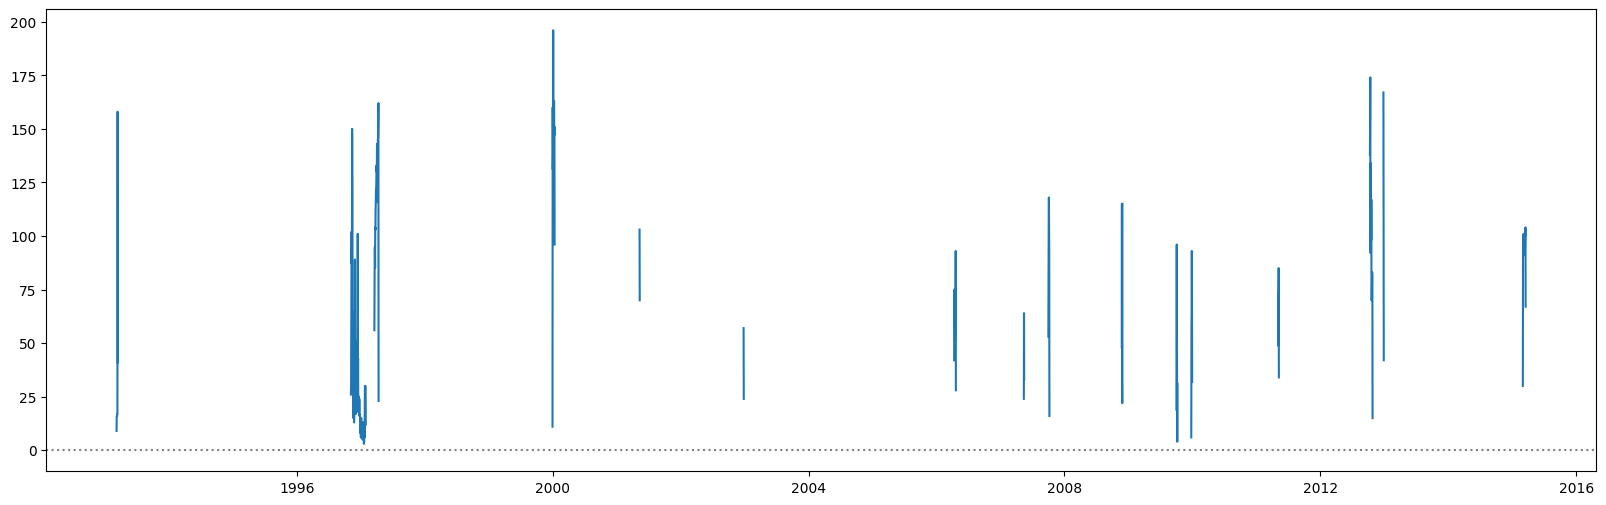

In [50]:
# data_combined[data_combined['source'] == 'CHART']
data_chart = data_combined[data_combined['source'] == 'CHART'].resample('D').size().rename("n")
data_chart = data_chart.replace(0, np.nan)
# data_chart = data_chart[data_chart > 0]
# data_chart[data_chart["n"] > 0]
# data_chart.columns

# data_chart[data_chart['0'] != 0]
# data_chart.rename(columns={0: "blah"})

plt.figure(figsize=(20, 6))
plt.axhline(y=0, color ='grey', linestyle = ':')
# plt.scatter(data_chart.index, data_chart, marker="x")
plt.plot(data_chart.index, data_chart)
plt.show()


In [ ]:
# # data_combined.index isin data_chart.dropna().index
# # data_chart.dropna()
# data_tally = data_combined["source"]
# data_tally = pd.DataFrame(data_tally)
# # data_tally['B'] = (~(data_combined["source"] == "CHART")).cumsum()
# # data_tally["2000-01-01 00:00:00"]
# # data_tally
# # data_tally['B'] = (~df['A']).cumsum()
# # data_tally['A'].sum()
# # data_tally['C'] = data_tally.duplicated(['source', 'B'], keep='first')
# # data_tally['C'].sum()

# data_tally['A'] = (data_tally["source"]=="CHART")
# # data_tally['B'] = (~data_tally['A']).cumsum()
# # data_tally['C'] = data_tally.duplicated(['A', 'B'], keep='first')
# # data_tally['C'].sum()
# # data_tally


# (data_tally['A']&data_tally['A'].shift(fill_value=False)).sum()

In [ ]:
# data_chart_days["chk_fail"].str.contains("Gap Fill").dropna()
# data_chart_days[(data_chart_days["chk_fail"] == "Gap Fill")]

datetime
1996-12-09 18:20:00    False
1996-12-09 19:28:00    False
1996-12-09 20:25:00    False
1996-12-09 21:17:00    False
1996-12-09 21:33:00    False
                       ...  
2015-03-18 13:13:00     True
2015-03-18 13:24:00     True
2015-03-18 13:36:00     True
2015-03-18 13:49:00     True
2015-03-18 14:03:00     True
Name: chk_fail, Length: 17588, dtype: object

In [ ]:
# data_chart.dropna().index
# data_combined.index.date
# data_chart.dropna().index.date
# data_combined.index.date
dates_to_filter = data_chart.dropna().index.date
# dates_to_filter.date
data_chart_days = data_combined[data_combined.index.floor('D').isin(dates_to_filter)]
# data_chart_days
# data_chart_days["source"].groupby(data_chart_days["source"].ne(data_chart_days["source"].shift()).cumsum()).cumcount()
# data_chart_days["tally"] = data_chart_days["source"].ne(data_chart_days["source"].shift()).cumsum()
# condition_gap = (data_chart_days["raw"] == -999.0) & (data_chart_days["chk_fail"] == "Gap Fill") & (data_chart_days["source"].isnull())
# data_chart_days[condition_gap]

# condition_gap = (data_chart_days["raw"] == -999.0) & (data_chart_days["chk_fail"].str.contains("Gap Fill")) & (data_chart_days["source"].isnull())
# # data_chart_days["source_mod"] = data_chart_days["source_mod"].astype(str)
# # data_chart_days.loc[condition_gap, "source_mod"] = "NA"

# data_chart_days["source_mod"] = data_chart_days["source"]
# data_chart_days.loc[condition_gap, "source_mod"] = "CHART"
# data_chart_days.loc[(data_chart_days["chk_note"] == "missing"), "source_mod"] = "CHART"

##
data_chart_days["source_mod"] = data_chart_days["source"]
data_chart_days["source_mod"] = data_chart_days["source_mod"].ffill()
##

# data_chart_days["source_mod"] = data_chart_days[]

# data_chart_days = data_chart_days.drop(['chk_note', 'chk_fail', 'comment'],axis=1)

# data_chart_days.loc[(data_chart_days["source_mod"].isnull())]
data_chart_days["group_tally"] = data_chart_days["source_mod"].ne(data_chart_days["source_mod"].shift()).cumsum(skipna=False)
data_chart_days["tally"] = data_chart_days["source_mod"].groupby(data_chart_days["source_mod"].ne(data_chart_days["source_mod"].shift()).cumsum(skipna=False)).cumcount()

data_chart_days["tally"] = data_chart_days["tally"]+1
# data_chart_days

# data_chart_days.groupby('group_tally')['tally'].max()
data_grouped_tally = data_chart_days.groupby('group_tally')['tally'].max()
# data_grouped_tally[data_grouped_tally == 1]
# data_grouped_tally == 1

data_chart_days[data_chart_days["group_tally"].isin(data_grouped_tally[data_grouped_tally == 1].index)]
# 1996-11-12 01:25:00, 2007-10-01 09:46:00
# data_chart_days["2007-10-01 00:00:00":"2007-10-01 23:59:59"]
# data_chart_days["group"]
# data_chart_days.loc[data_grouped_tally["tally"], "tally"]

# data_chart_days
# data_grouped_tally[data_grouped_tally == 1].index
# data_chart_days["tally"] == 1

# data_chart_days = data_chart_days.drop(['chk_note', 'chk_fail', 'comment'],axis=1)
# data_chart_days["group_tally"] = data_chart_days["source"].ne(data_chart_days["source"].shift()).cumsum()
# data_chart_days["tally"] = data_chart_days["source"].groupby(data_chart_days["source"].ne(data_chart_days["source"].shift()).cumsum()).cumcount()
# data_chart_days

# plt.figure(figsize=(20, 6))
# plt.axhline(y=0, color ='grey', linestyle = ':')
# # plt.scatter(data_chart.index, data_chart, marker="x")
# for source in data_chart_days["source"].unique():
#     # plt.scatter(data_chart_days.index, (data_chart_days["source"]==source))
#     plt.scatter(range(len(data_chart_days)), (data_chart_days["source"]==source), label=source, s=0.25)
#     # plt.scatter(range(len(data_chart_days)), data_chart_days[data_chart_days["source"]==source]["level"])
# # plt.scatter(range(len(data_chart_days)), data_chart_days['raw'], hue="source")
# plt.legend()
# plt.show()
# # data_combined[data_combined.index.isin(data_chart.dropna().index)]
# # data_combined.loc[data_chart.dropna().index.date]


/var/folders/dr/4_7b2hbn60q7cynx4gmn5vhr0000gp/T/ipykernel_96735/1560429241.py:7: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  data_chart_days = data_combined[data_combined.index.floor('D').isin(dates_to_filter)]
/var/folders/dr/4_7b2hbn60q7cynx4gmn5vhr0000gp/T/ipykernel_96735/1560429241.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_chart_days["source_mod"] = data_chart_days["source"]
/var/folders/dr/4_7b2hbn60q7cynx4gmn5vhr0000gp/T/ipykernel_96735/1560429241.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,level,raw,chk_note,chk_fail,comment,source,source_mod,group_tally,tally
datetime,,,,,,,,,
2007-10-01 00:00:00,112.5,112.5,nc,NaN,NaN,ISCO,ISCO,21,156
2007-10-01 00:05:00,112.3,112.3,nc,NaN,NaN,ISCO,ISCO,21,157
2007-10-01 00:10:00,112.1,112.1,nc,NaN,NaN,ISCO,ISCO,21,158
2007-10-01 00:15:00,111.8,111.8,nc,NaN,NaN,ISCO,ISCO,21,159
2007-10-01 00:20:00,111.6,111.6,nc,NaN,NaN,ISCO,ISCO,21,160
...,...,...,...,...,...,...,...,...,...
2007-10-01 23:37:00,0.0,-999.0,missing,NaN,NaN,NaN,CHART,24,143
2007-10-01 23:42:00,0.0,-999.0,missing,NaN,NaN,CHART,CHART,24,144
2007-10-01 23:49:00,0.0,-999.0,missing,NaN,NaN,CHART,CHART,24,145


In [262]:
# data_combined[(data_combined['chk_note']=="missing") & (data_combined['level']!= 0)]
# data_combined[(data_combined['chk_note']!="missing") & (data_combined['raw']== -999.0)]
# data_combined[(data_combined['chk_note']=="missing") & (data_combined['raw']== -999.0)]
# data_combined[(data_combined['chk_fail'].str.contains("Gap Fill") == False) & (data_combined['chk_note']!="missing") & (data_combined['raw']== -999.0)]
# data_combined[(data_combined['chk_fail'].str.contains("Gap Fill") == False) & (data_combined['raw']== -999.0)]
# data_combined[(data_combined['raw']== -999.0) & (data_combined['level']!=0)]
# data_combined[(data_combined['chk_note']=="missing") & (data_combined['raw']!= -999.0)]
# print(len(data_combined[(data_combined['chk_note']!="missing") & (data_combined['source']!= "CHART")]))
# print(len(data_combined[(data_combined['chk_note']!= "missing")]))
# print(len(data_combined[(data_combined['source']== "CHART")]))

# print(len(data_combined[(data_combined['chk_note']!= "missing")]) - len(data_combined[(data_combined['source']== "CHART")]))

# data_combined[(data_combined['chk_note']!="missing") & (data_combined['source']== "CHART")]
# dates_gaps = set(data_combined[(data_combined['chk_fail'].str.contains("Gap Fill", na=False))].index.date)

# data_combined[data_combined.index.floor('D').isin(dates_gaps)]

data_mixed = data_combined.copy()
data_mixed["source_ffill"] = data_mixed["source"].ffill()
data_mixed["source_bfill"] = data_mixed["source"].bfill()
# data_mixed[(data_mixed['chk_fail'].str.contains("Gap Fill")) | (data_mixed['chk_note']=="missing") | (data_mixed['raw']== -999.0)]

# data_mixed[(data_mixed['chk_fail'].str.contains("Gap Fill")) & (data_mixed['source'].isnull()) & ((data_mixed['source_ffill'] != "CHART") | (data_mixed['source_bfill'] != "CHART"))]
# 07-09
# data_mixed["1997-07-17 00:00:00":"1997-07-21 23:59:59"]
# data_mixed["1997-03-19 00:00:00":"1997-03-19 23:59:59"]
# print(len(data_mixed[(data_mixed['source'] == "CHART")]),
#     len(data_mixed[(data_mixed['source_bfill'] == "CHART") & (data_mixed['chk_fail'].str.contains("Gap Fill", na=False))])
# )

data_mixed[(data_mixed["source_bfill"] != data_mixed["source_ffill"]) & ((data_mixed["source_bfill"] != "CHART") | (data_mixed["source_ffill"] != "CHART"))]
# data_mixed["2002-12-27 07:00:00":"2002-12-27 10:00:00"]

# data_mixed[data_mixed['chk_']]
# data_combined[(data_combined['chk_fail'].str.contains("Gap Fill", na=False))]
# len(data_combined[(data_combined['chk_note']!="missing")]) + len(data_combined[(data_combined['source']!= "CHART")])

# set(data_combined[data_combined['raw'] == -999.0].index.date)

,level,raw,chk_note,chk_fail,comment,source,source_ffill,source_bfill
datetime,,,,,,,,
1997-03-19 10:00:00,14.70,-999.00,adjusted,Gap Fill,NaN,NaN,ISCO,CHART
2001-05-11 00:00:00,8.90,-999.00,adjusted,Gap Fill,NaN,NaN,ISCO,CHART
2002-12-25 23:55:00,29.40,-999.00,adjusted,Gap Fill,NaN,NaN,ISCO,CHART
2002-12-26 00:00:00,29.40,-999.00,adjusted,Gap Fill,NaN,NaN,ISCO,CHART
2002-12-26 00:05:00,29.40,-999.00,adjusted,Gap Fill,NaN,NaN,ISCO,CHART
...,...,...,...,...,...,...,...,...
2025-08-01 12:40:00,60.00,60.00,nc,NaN,NaN,NaN,RADAR,NaN
2025-08-01 12:45:00,60.02,60.02,nc,NaN,NaN,NaN,RADAR,NaN
2025-08-01 12:50:00,59.65,59.65,nc,NaN,NaN,NaN,RADAR,NaN


In [313]:

data_mixed_filtered = data_mixed[
    (data_mixed["source"] != "CHART") &
    ((data_mixed["source_ffill"] == data_mixed["source_bfill"]) | data_mixed["source_bfill"].isnull()) &
    (data_mixed["source_ffill"] != "CHART") &
    (data_mixed["source_bfill"] != "CHART")
    ]#["2002-12-26 00:00:00":"2002-12-26 23:59:59"]

# data_mixed_filtered[~data_mixed_filtered["chk_fail"].isnull()]["chk_fail"].unique()
# data_mixed_filtered[data_mixed_filtered["chk_fail"].str.contains("Gap Fill", na=False)]["chk_note"].unique()
# data_mixed_filtered[data_mixed_filtered["raw"] == -999.0]

# data_mixed_filtered[data_mixed_filtered["chk_note"] == "missing"]
# data_mixed_filtered[(data_mixed_filtered["raw"] == -999.0)]["chk_fail"].unique()
# data_mixed_filtered[(data_mixed_filtered["raw"] == -999.0) & (data_mixed_filtered["level"] != 0)]#["chk_fail"].unique()
data_mixed_filtered[(data_mixed_filtered["raw"] < 0) & (data_mixed_filtered["raw"] != -999.0) & (data_mixed_filtered["level"] > 0)]
# data_mixed_filtered[(data_mixed_filtered["raw"] == -999.0) & (data_mixed_filtered["chk_fail"].isnull())]


,level,raw,chk_note,chk_fail,comment,source,source_ffill,source_bfill
datetime,,,,,,,,
2023-01-06 14:20:00,35.64,-3.88,adjusted,Weir Cleaning,NaN,NaN,RADAR,NaN
2023-01-06 14:25:00,35.64,-52.76,adjusted,Weir Cleaning,NaN,NaN,RADAR,NaN
2023-01-06 14:30:00,35.65,-76.06,adjusted,Weir Cleaning,NaN,NaN,RADAR,NaN
2023-01-06 14:35:00,35.65,-93.39,adjusted,Weir Cleaning,NaN,NaN,RADAR,NaN
2023-01-06 14:40:00,35.65,-106.50,adjusted,Weir Cleaning,NaN,NaN,RADAR,NaN
...,...,...,...,...,...,...,...,...
2025-03-30 10:35:00,24.22,-11.27,adjusted,Weir Cleaning,NaN,NaN,RADAR,NaN
2025-03-30 10:40:00,24.28,-8.50,adjusted,Weir Cleaning,NaN,NaN,RADAR,NaN
2025-03-30 10:45:00,24.33,-6.17,adjusted,Weir Cleaning,NaN,NaN,RADAR,NaN


In [322]:
data_combined[data_combined["chk_fail"].str.contains(",", na=False)]

,level,raw,chk_note,chk_fail,comment,source
datetime,,,,,,
1996-04-23 23:55:00,14.00,18.00,adjusted,"Calibration, Calibration",NaN,CHART+AF
1996-05-18 21:20:00,25.00,29.00,adjusted,"Calibration, Calibration",NaN,CHART+AF
1996-05-18 21:25:00,24.00,28.00,adjusted,"Calibration, Calibration",NaN,CHART+AF
1996-06-12 21:20:00,47.80,51.80,adjusted,"Calibration, Calibration",NaN,CHART+AF
1996-06-12 21:25:00,47.80,51.80,adjusted,"Calibration, Calibration",NaN,CHART+AF
...,...,...,...,...,...,...
2025-05-15 15:10:00,26.66,40.93,adjusted,"Obstruction, Obstruction",NaN,NaN
2025-07-17 08:40:00,50.63,55.32,adjusted,"Obstruction, Obstruction",NaN,NaN
2025-07-17 08:45:00,50.66,55.04,adjusted,"Obstruction, Obstruction",NaN,NaN


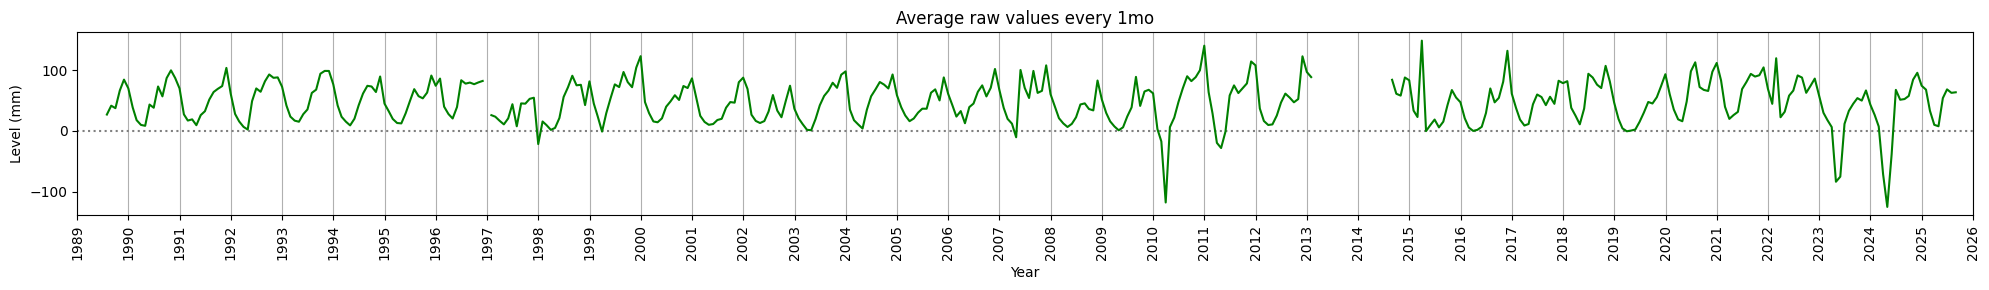

In [321]:
data_mixed_filtered_sumstats = data_mixed_filtered['raw'].dropna().resample('1ME').agg(['count', 'mean','std', 'min', 'max'])

# data_mixed[
#     # (data_mixed["source"] == "CHART") |
#     ((data_mixed["source_ffill"] != data_mixed["source_bfill"]))
#     # data_mixed["source"].isnull()
#     ]

# data_mixed[((data_mixed["source_ffill"] != data_mixed["source_bfill"]))]
# data_mixed["2002-12-26 00:00:00":"2002-12-26 23:59:59"]

fig, ax = plt.subplots(figsize=(20, 3))
## Line for 0
plt.axhline(y=0, color = "grey", linestyle = ":")
# Mean
ax.plot(data_mixed_filtered_sumstats.index, data_mixed_filtered_sumstats['mean'], color = 'green')
# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', label = "Mean")
# Ribbon for standard deviation
# ax.fill_between(data_mixed_filtered_sumstats.index, data_mixed_filtered_sumstats['mean']-data_mixed_filtered_sumstats['std'], data_mixed_filtered_sumstats['mean']+data_mixed_filtered_sumstats['std'], color = 'aquamarine', label = "std")
ax.set_xlabel("Year")
ax.set_ylabel("Level (mm)")
ax.set_title("Average raw values every 1mo")
# ax.set_ylim(bottom = 0)
ax.set_xlim(left = dt.date(1989, 1, 1), right = dt.date(2026, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator(month = 1)) # Show ticks at start of year
plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid(axis = 'x', which = 'major')
# plt.legend(loc = 'upper right')
# Truncate plot
# ax.set_ylim(bottom = 0, top = 250)

plt.show()

del fig, ax

## Exploration

### General Variables

In [ ]:
# Explore weir combined data, comments, etc.
print(
    "-----Data types-----", data_combined.dtypes,
    "\n-----Source-----", data_combined['source'].value_counts(dropna = False),
    "\n-----Notes-----", data_combined['chk_note'].value_counts(dropna = False),
    "\n-----Comments-----", data_combined['comment'].value_counts(dropna = False),
    "\n-----Fail mode-----", data_combined['chk_fail'].value_counts(dropna = False),
    sep="\n"
)

### Visualization

In [ ]:
def plot_between(input_date_start, input_date_end, include_calibration=True):
    """Plot values between two dates in the style of the Visual FoxPro interface.

    Args:
        input_date_start (Timestamp): The start date.
        input_date_end (Timestamp): The end date.
        include_calibration (boolean): Include X-markers for the calibration points.
    
    Returns:
        Time series plot.
    """
    # Filter the data sets
    data_subset = data_combined.loc[input_date_start:input_date_end]
    data_subset_rain = data_rainfall.loc[input_date_start:input_date_end]
    data_subset_cal = data_calibration.loc[input_date_start:input_date_end]

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.axhline(y=0, color ='grey', linestyle = ':')
    # Plot the rain as a bar chart with a multiplier for visibility
    ax.vlines(data_subset_rain.index, ymin=0, ymax=data_subset_rain['ra']*3, color = 'blue', label = "Rain (x3)")
    ax.plot(data_subset.index, data_subset['level'], color = 'red', label = "Adjusted")
    ax.plot(data_subset.index, data_subset['raw'], color = 'green', label = "Raw")
    # Include calibration points unless otherwise specified or unless there are none in the subset
    if include_calibration == True and not data_subset_cal.empty:
        ax.plot(data_subset_cal.index, data_subset_cal['weir_level'], linestyle='none', marker='x', color='red', label = "Calibration")

    # Plot labels
    ax.set_xlabel("Date (YYYY-MM-DD)")
    ax.set_ylabel("Level (mm)")
    # ax.set_title('Simple Time Series Plot')
    ax.set_title("Runoff time series from " + input_date_start + " through " + input_date_end)
    # ax.set_ylim(bottom=0) 
    # ax.grid(True)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # Reverse the order of the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], labels[::-1], loc='upper right')
    # plt.legend(loc = 'upper right')
    return plt.show()

In [ ]:
plot_between('2010-05-20 00:00:00','2010-05-25 23:59:59')
# plot_between('2020-05-31 00:00:00','2020-06-16 23:59:59')
plot_between('2023-05-14 00:00:00','2023-06-15 23:59:59')
# plot_between('2002-07-30 00:00:00','2002-08-02 23:59:59')

In [ ]:
# plot_between('2013-01-02 18:59:38', '2014-08-22 10:21:32', include_calibration=False)
# plot_between('2012-12-15 00:00:00', '2013-01-02 23:59:59', include_calibration=False)
# data_combined['2012-12-25 00:00:00':'2012-12-28 23:59:59']

### Statistics

In [ ]:
# Source insights
print(data_combined['1978-01-01 00:00:00':].groupby('source', dropna=False, observed=True)['raw'].agg(['count','mean', 'min', 'max']))

In [ ]:
# time_series = pd.Series(data_combined, index='datetime')
# time_series
# pd.DatetimeIndex.to_series(data_combined)
# time_series = pd.to_datetime(data_combined.index())

# data_sumstats = data_combined['raw'].dropna().resample('1YE').agg(['mean','std', 'min', 'max']).dropna()
# data_sumstats

# Removing values below 0
data_sumstats = data_combined[data_combined['raw'] >= 0]
# Get yearly averages and std
data_sumstats_yr = data_sumstats['raw'].dropna().resample('1YE').agg(['count', 'mean','std', 'min', 'max'])
# Get monthly averages and std
data_sumstats = data_sumstats['raw'].dropna().resample('1ME').agg(['mean','std'])

# Simplifying datetime to the year for readability
data_sumstats_yr = data_sumstats_yr.reset_index()
data_sumstats_yr['year'] = data_sumstats_yr['datetime'].dt.year
data_sumstats_yr = data_sumstats_yr.set_index('year').drop('datetime', axis=1)
print(data_sumstats_yr)

In [ ]:
#Running avg plot

fig, ax = plt.subplots(figsize=(10, 3))
## Line for 0
# plt.axhline(y=0, color = "grey", linestyle = ":")
# Mean
ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green')
# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', label = "Mean")
# Ribbon for standard deviation
# ax.fill_between(data_sumstats.index, data_sumstats['mean']-data_sumstats['std'], data_sumstats['mean']+data_sumstats['std'], color = 'aquamarine', label = "std")
ax.set_xlabel("Year")
ax.set_ylabel("Level (mm)")
ax.set_title("Average raw values every 1mo")
ax.set_ylim(bottom = 0)
ax.set_xlim(left = dt.date(1989, 1, 1), right = dt.date(2026, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator(month = 1)) # Show ticks at start of year
plt.xticks(rotation = 90)
plt.tight_layout()
plt.grid(axis = 'x', which = 'major')
# plt.legend(loc = 'upper right')
# Truncate plot
# ax.set_ylim(bottom = 0, top = 250)

plt.show()

del fig, ax

## Uniting

The calibration, combined (runoff), and rainfall data can be united into a single data frame.
Soil samples do not have the same granularity, so can be stored separately from these so as to avoid duplicated values.

In [ ]:
# ## TSTING UNIFICATION WITH SMALL SUBSET
# # data_united = data_combined['2010-01-01 00:00:00':'2010-12-31 23:59:59']
# # data_united = data_united.add_suffix("_runoff")
# mini_start = '2010-01-01 00:00:00'
# mini_end = '2010-12-31 23:59:59'
# mini_calibration = data_calibration[mini_start:mini_end]
# mini_combined = data_combined[mini_start:mini_end]
# mini_rain = data_rainfall[mini_start:mini_end]

# # pd.merge(mini_calibration, mini_combined, left_index=True, right_index=True, how='outer', suffixes=('_cal', '_runoff'))
# mini_united = pd.merge(mini_calibration.add_suffix("_cal"), mini_combined.add_suffix("_ro"), left_index=True, right_index=True, how='outer')
# mini_united = pd.merge(mini_rain.add_suffix("_rain"), mini_united, left_index=True, right_index=True, how='outer')
# # mini_united.rename(columns={'weir_level'})
# # mini_united.dropna(subset=['weir_level_cal'])

# # Checking to make sure sources match
# # mini_united["match_source"] = (mini_united["source_ro"] == mini_united["source_rain"]) | (mini_united["source_ro"].isnull() & mini_united["source_rain"].isnull())
# # mini_united[(mini_united["match_source"]==False)]
# # mini_united

# # mini_united = mini_united.drop("source_rain",axis=1)
# # mini_united.rename(columns={"source_ro":"source"})

In [ ]:
## Another
# pd.merge(data_soil_deep.add_suffix("_shallow"), data_soil_deep.add_suffix("_deep"), left_index=True, right_index=True, how='outer')
united_soil = pd.merge(data_soil_shallow.reset_index(), data_soil_deep.reset_index(), on=["date", "sample"], suffixes=("_shallow", "_deep"), how="outer")
united_soil = united_soil.set_index('date')
# Modifying sample to int for sorting
united_soil["sample"] = united_soil["sample"].astype('int')
# Sorting for readability
united_soil = united_soil.sort_values(by=['date', 'sample'])
# Reset to category
united_soil["sample"] = united_soil["sample"].astype('category')
# Moving sample to front of data frame
soil_samples = united_soil.pop('sample')
united_soil.insert(0, 'sample', soil_samples)
del soil_samples
#
united_soil

# Missing values:
# united_soil[united_soil['h2o_by_wet_shallow'].isnull() | united_soil['h2o_by_wet_deep'].isnull()]

In [ ]:
# Checking column matching
# Checking to make sure sources match
def check_cols(input_df, input_col_left, input_col_right, find_mismatch=True):
    input_df["match"] = (input_df[input_col_left] == input_df[input_col_right]) | (input_df[input_col_left].isnull() & input_df[input_col_right].isnull())
    if find_mismatch == True:
        input_df = input_df[(input_df["match"]==False)]
    return input_df

# check_cols(mini_united, "source_ro", "source_rain")
# check_cols(mini_united, "chk_note_rain", "chk_note_ro")
# check_cols(mini_united, "comment_rain", "comment_ro")

# check_cols(mini_united, 'chk_note_rain', 'chk_note_ro')
# mini_united.dropna(subset="chk_note_rain")
# check_cols(mini_united, 'chk_fail_rain', 'chk_fail_rain')

In [ ]:
united_water = pd.merge(data_rainfall.add_suffix("_rain"), data_combined.add_suffix("_ro"), left_index=True, right_index=True, how='outer')
united_water = pd.merge(data_calibration.add_suffix("_cal"), united_water, left_index=True, right_index=True, how='outer')
united_water.info()

In [ ]:
## Another
united_soil = pd.merge(data_soil_shallow.reset_index(), data_soil_deep.reset_index(), on=["date", "sample"], suffixes=("_shallow", "_deep"), how="outer")
united_soil = united_soil.set_index('date')
# Modifying sample to int for sorting
united_soil["sample"] = united_soil["sample"].astype('int')
# Sorting for readability
united_soil = united_soil.sort_values(by=['date', 'sample'])
# Reset to category
united_soil["sample"] = united_soil["sample"].astype('category')
# Moving sample to front of data frame
soil_samples = united_soil.pop('sample')
united_soil.insert(0, 'sample', soil_samples)
#
united_soil.info()

# Missing values:
# united_soil[united_soil['h2o_by_wet_shallow'].isnull() | united_soil['h2o_by_wet_deep'].isnull()]

In [ ]:
united_soil_mini = united_soil[['sample', 'h2o_by_wet_shallow', 'h2o_by_wet_deep']]
united_soil_mini = united_soil_mini.groupby('sample').resample('1ME').mean().reset_index().set_index('date')
# united_soil_mini = united_soil[['h2o_by_wet_shallow', 'h2o_by_wet_deep']]
# united_soil_mini = united_soil_mini.resample('1ME').mean()#.reset_index().set_index('date')

united_soil_mini

In [ ]:
#Running avg plot

fig, ax = plt.subplots(figsize=(15, 3))
## Line for 0
# plt.axhline(y=0, color = "grey", linestyle = ":")
# Mean
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_shallow'], color = 'pink')
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_deep'], color = 'purple')

ax2 = ax.twinx()
# zord = 1
for category, group_df in united_soil_mini.groupby('sample'):
    # ax2.plot(group_df.index, group_df['h2o_by_wet_shallow'], label=category, alpha=0.5, color='orange', linewidth = 0.25, zord = 1)
    ax2.plot(group_df.index, group_df['h2o_by_wet_shallow'], label=category, alpha=0.75, color='orange', linewidth = 0.25)
    # zord += 1
# for category, group_df in united_soil_mini.groupby('sample'):
    ax2.plot(group_df.index, group_df['h2o_by_wet_deep'], label=category, alpha=0.75, color='purple', linewidth = 0.25)
    # zord += 1
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_shallow'], label="Shallow", color='orange', linewidth = 0.5)
# ax.plot(united_soil_mini.index, united_soil_mini['h2o_by_wet_deep'], label="Deep", color='purple', linewidth = 0.5)

# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', zorder = zord)
ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green')

# ax.plot(data_sumstats.index, data_sumstats['mean'], color = 'green', label = "Mean")
# Ribbon for standard deviation
# ax.fill_between(data_sumstats.index, data_sumstats['mean']-data_sumstats['std'], data_sumstats['mean']+data_sumstats['std'], color = 'aquamarine', label = "std")
ax.set_xlabel("Year")
ax.set_ylabel("Level (mm)")
ax.set_title("Average raw values every 1mo")
# ax.set_ylim(bottom = 0)
ax.set_xlim(left = dt.date(1989, 1, 1), right = dt.date(2026, 1, 1))
ax.xaxis.set_major_locator(mdates.YearLocator(month = 1)) # Show ticks at start of year
plt.xticks(rotation = 90)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.grid(axis = 'x', which = 'major')
# plt.legend(loc = 'upper right')
# Truncate plot
# ax.set_ylim(bottom = 0, top = 250)

# Set moisture plot to back
ax2.set_zorder(1)
# Set mean line to be in front
ax.set_zorder(2)
# Change background of mean line plot transparent
ax.patch.set_visible(False)

plt.show()

del fig, ax#, zord

In [ ]:
# united_soil[('h2o_by_wet_shallow', 'h2o_by_wet_deep')]#.resample('1YE').agg(['mean', 'std'])
# united_sumstats_soil = pd.DataFrame()
# united_sumstats_soil = united_soil['h2o_by_wet_shallow'].dropna().resample('1YE').mean()
# united_sumstats_soil['h2o_by_wet_deep'] = united_soil['h2o_by_wet_deep'].dropna().resample('1YE').mean()
# united_sumstats_soil
# united_soil.groupby('sample')
# united_soil['h2o_by_wet_shallow'].dropna().resample('1YE').mean()
# united_soil
# united_soil_test = united_soil.groupby('sample')
united_soil_test = united_soil[['sample', 'h2o_by_wet_shallow']]
# united_soil.resample('1YE')['h2o_by_wet_shallow'].dropna().mean()
# united_soil_test.groupby('sample').resample('1YE').mean()#.dropna().mean()
print(united_soil_test.groupby('sample').resample('1YE').mean())

# # Removing values below 0
# data_sumstats = data_combined[data_combined['raw'] >= 0]
# # Get yearly averages and std
# data_sumstats_yr = data_sumstats['raw'].dropna().resample('1YE').agg(['count', 'mean','std', 'min', 'max'])
# # Get monthly averages and std
# data_sumstats = data_sumstats['raw'].dropna().resample('1ME').agg(['mean','std'])

# # Simplifying datetime to the year for readability
# data_sumstats_yr = data_sumstats_yr.reset_index()
# data_sumstats_yr['year'] = data_sumstats_yr['datetime'].dt.year
# data_sumstats_yr = data_sumstats_yr.set_index('year').drop('datetime', axis=1)
# print(data_sumstats_yr)